In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-ml-salaries/salaries.csv


# <p style="font-size: 50px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align: center;">SALARY DATASET FOR PROGRAMMER</p>

## <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align: center;">Import thư viện cần thiết cho việc phân tích tập dữ liệu lương</p>

In [2]:
import pandas as pd
import os
import shutil
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align: center">Load tập dữ liệu về lương</p>

In [3]:
df = pd.read_csv('/kaggle/input/ai-ml-salaries/salaries.csv')

In [4]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
73143,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
73144,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
73145,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
73146,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [5]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M


In [6]:
df.tail(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
73143,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
73144,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
73145,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
73146,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
73147,2021,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


In [7]:
df.shape

(73148, 11)

In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,73148.000000,7.314800e+04,73148.000000,73148.000000
mean,2023.831192,1.625534e+05,158013.748619,21.582955
std,0.477551,1.925761e+05,72501.304728,41.023051
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.069575e+05,106890.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [9]:
df.describe(include="object")

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,73148,73148,73148,73148,73148,73148,73148
unique,4,4,289,25,93,86,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,42926,72808,11443,69418,65982,66035,70536


In [10]:
df.describe(include="int64")

,work_year,salary,salary_in_usd,remote_ratio
count,73148.000000,7.314800e+04,73148.000000,73148.000000
mean,2023.831192,1.625534e+05,158013.748619,21.582955
std,0.477551,1.925761e+05,72501.304728,41.023051
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.069575e+05,106890.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73148 non-null  int64 
 1   experience_level    73148 non-null  object
 2   employment_type     73148 non-null  object
 3   job_title           73148 non-null  object
 4   salary              73148 non-null  int64 
 5   salary_currency     73148 non-null  object
 6   salary_in_usd       73148 non-null  int64 
 7   employee_residence  73148 non-null  object
 8   remote_ratio        73148 non-null  int64 
 9   company_location    73148 non-null  object
 10  company_size        73148 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


In [12]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [13]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [14]:
df.isna()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
73143,False,False,False,False,False,False,False,False,False,False,False
73144,False,False,False,False,False,False,False,False,False,False,False
73145,False,False,False,False,False,False,False,False,False,False,False
73146,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isna().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

In [16]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [17]:
for i in df.select_dtypes(include="int64").columns:
    print(df[i].value_counts())
    print("***"*10)

work_year
2024    62228
2023     8522
2022     1659
2025      446
2021      218
2020       75
Name: count, dtype: int64
******************************
salary
160000    1437
110000    1188
150000    1098
100000    1001
180000     969
          ... 
196110       1
219375       1
62691        1
44803        1
412000       1
Name: count, Length: 7094, dtype: int64
******************************
salary_in_usd
160000    1426
110000    1157
150000    1092
100000     976
180000     963
          ... 
231540       1
123950       1
53200        1
39900        1
94665        1
Name: count, Length: 7702, dtype: int64
******************************
remote_ratio
0      57220
100    15647
50       281
Name: count, dtype: int64
******************************


In [18]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

experience_level
SE    42926
MI    21851
EN     6877
EX     1494
Name: count, dtype: int64
******************************
employment_type
FT    72808
PT      175
CT      149
FL       16
Name: count, dtype: int64
******************************
job_title
Data Scientist                      11443
Data Engineer                        9405
Software Engineer                    7814
Data Analyst                         7334
Machine Learning Engineer            5807
                                    ...  
Applied Research Scientist              1
People Data Analyst                     1
AI Software Development Engineer        1
Lead AI Engineer                        1
Controls Engineer                       1
Name: count, Length: 289, dtype: int64
******************************
salary_currency
USD    69418
GBP     2046
EUR     1225
CAD      223
INR       73
PLN       34
CHF       32
AUD       18
BRL       16
SGD       12
PHP        9
JPY        8
HUF        5
DKK        5
TRY        4
CZK 

In [19]:
for column in df.columns:
    distinct_values= len(df[column].unique())
    print(f"{column}: {distinct_values} giá trị")

work_year: 6 giá trị
experience_level: 4 giá trị
employment_type: 4 giá trị
job_title: 289 giá trị
salary: 7094 giá trị
salary_currency: 25 giá trị
salary_in_usd: 7702 giá trị
employee_residence: 93 giá trị
remote_ratio: 3 giá trị
company_location: 86 giá trị
company_size: 3 giá trị


In [20]:
df.work_year.value_counts()

work_year
2024    62228
2023     8522
2022     1659
2025      446
2021      218
2020       75
Name: count, dtype: int64

In [21]:
df.experience_level.value_counts()

experience_level
SE    42926
MI    21851
EN     6877
EX     1494
Name: count, dtype: int64

In [22]:
df.employment_type.value_counts()

employment_type
FT    72808
PT      175
CT      149
FL       16
Name: count, dtype: int64

In [23]:
df.job_title.value_counts()

job_title
Data Scientist                      11443
Data Engineer                        9405
Software Engineer                    7814
Data Analyst                         7334
Machine Learning Engineer            5807
                                    ...  
Applied Research Scientist              1
People Data Analyst                     1
AI Software Development Engineer        1
Lead AI Engineer                        1
Controls Engineer                       1
Name: count, Length: 289, dtype: int64

In [24]:
df.salary.value_counts()

salary
160000    1437
110000    1188
150000    1098
100000    1001
180000     969
          ... 
196110       1
219375       1
62691        1
44803        1
412000       1
Name: count, Length: 7094, dtype: int64

In [25]:
df.salary_currency.value_counts()

salary_currency
USD    69418
GBP     2046
EUR     1225
CAD      223
INR       73
PLN       34
CHF       32
AUD       18
BRL       16
SGD       12
PHP        9
JPY        8
HUF        5
DKK        5
TRY        4
CZK        3
MXN        3
ILS        3
ZAR        3
NOK        2
THB        2
SEK        1
NZD        1
HKD        1
CLP        1
Name: count, dtype: int64

In [26]:
df.salary_in_usd.value_counts()

salary_in_usd
160000    1426
110000    1157
150000    1092
100000     976
180000     963
          ... 
231540       1
123950       1
53200        1
39900        1
94665        1
Name: count, Length: 7702, dtype: int64

In [27]:
df.employee_residence.value_counts()

employee_residence
US    65982
CA     2513
GB     2127
AU      238
DE      222
      ...  
BM        1
RW        1
UG        1
AD        1
JE        1
Name: count, Length: 93, dtype: int64

In [28]:
df.remote_ratio.value_counts()

remote_ratio
0      57220
100    15647
50       281
Name: count, dtype: int64

In [29]:
df.company_location.value_counts()

company_location
US    66035
CA     2515
GB     2135
AU      242
DE      230
      ...  
BS        1
MY        1
IQ        1
CN        1
MD        1
Name: count, Length: 86, dtype: int64

In [30]:
df.company_size.value_counts()

company_size
M    70536
L     2407
S      205
Name: count, dtype: int64

In [31]:
df.work_year.unique()

array([2025, 2024, 2022, 2023, 2020, 2021])

In [32]:
df.experience_level.unique()

array(['SE', 'EN', 'MI', 'EX'], dtype=object)

In [33]:
df.employment_type.unique()

array(['FT', 'PT', 'CT', 'FL'], dtype=object)

In [34]:
df.job_title.unique()

array(['Data Product Owner', 'Engineer', 'Manager', 'Data Scientist',
       'AI Architect', 'Data Engineer', 'AI Engineer',
       'Research Engineer', 'Data Analyst',
       'Business Intelligence Developer', 'Data Manager',
       'Data Management Specialist', 'Quantitative Developer',
       'Software Engineer', 'Technical Lead',
       'Sales Development Representative', 'Consultant', 'Analyst',
       'System Engineer', 'Product Manager', 'Analytics Engineer',
       'Solution Architect', 'Associate',
       'Encounter Data Management Professional',
       'Data Infrastructure Engineer', 'Data Architect', 'Data Team Lead',
       'Business Intelligence Lead', 'DevOps Engineer',
       'Decision Scientist', 'Machine Learning Engineer', 'Architect',
       'Data Visualization Engineer', 'Applied Scientist',
       'Data Governance Analyst', 'Data Governance',
       'Data Quality Analyst', 'Lead Analyst', 'Data Specialist',
       'Research Scientist', 'Software Developer',
       

In [35]:
df.salary.unique()

array([170000, 110000, 143000, ..., 138350, 423000, 412000])

In [36]:
df.salary_currency.unique()

array(['USD', 'GBP', 'EUR', 'PHP', 'CAD', 'SGD', 'BRL', 'INR', 'PLN',
       'CHF', 'AUD', 'JPY', 'DKK', 'CZK', 'HUF', 'MXN', 'ILS', 'TRY',
       'ZAR', 'SEK', 'NZD', 'NOK', 'HKD', 'THB', 'CLP'], dtype=object)

In [37]:
df.salary_in_usd.unique()

array([170000, 110000, 143000, ...,  28369, 412000,  94665])

In [38]:
df.employee_residence.unique()

array(['US', 'GB', 'CA', 'DE', 'LT', 'SK', 'FR', 'AU', 'AT', 'PH', 'AM',
       'SG', 'LU', 'BR', 'NL', 'IT', 'CO', 'CL', 'IN', 'PL', 'CY', 'ES',
       'RW', 'NZ', 'CH', 'LV', 'IL', 'CZ', 'IE', 'JP', 'PE', 'KR', 'ZA',
       'EG', 'PR', 'LB', 'GR', 'AR', 'FI', 'MX', 'DK', 'NG', 'BE', 'BG',
       'EC', 'SV', 'CR', 'HU', 'PT', 'HR', 'KE', 'SE', 'UA', 'TR', 'PK',
       'HN', 'MT', 'RO', 'VE', 'BM', 'VN', 'RS', 'GE', 'AE', 'SA', 'OM',
       'BA', 'EE', 'UG', 'SI', 'MU', 'TH', 'QA', 'RU', 'TN', 'GH', 'AD',
       'MD', 'NO', 'UZ', 'HK', 'CF', 'KW', 'IR', 'AS', 'CN', 'BO', 'DO',
       'ID', 'MY', 'DZ', 'IQ', 'JE'], dtype=object)

In [39]:
df.remote_ratio.unique()

array([  0, 100,  50])

In [40]:
df.company_location.unique()

array(['US', 'GB', 'CA', 'DE', 'LT', 'SK', 'FR', 'AU', 'AT', 'PH', 'AM',
       'SG', 'LU', 'BR', 'NL', 'IT', 'CO', 'CL', 'IN', 'PL', 'CY', 'ES',
       'CD', 'NZ', 'CH', 'LV', 'IL', 'CZ', 'IE', 'JP', 'PE', 'KR', 'ZA',
       'EG', 'PR', 'LB', 'GR', 'AR', 'FI', 'MX', 'DK', 'NG', 'BE', 'BG',
       'EC', 'SV', 'CR', 'HU', 'PT', 'HR', 'KE', 'SE', 'UA', 'TR', 'PK',
       'HN', 'MT', 'RO', 'VE', 'DZ', 'AS', 'RS', 'AE', 'SA', 'OM', 'BA',
       'EE', 'VN', 'GI', 'SI', 'MU', 'RU', 'QA', 'GH', 'AD', 'NO', 'HK',
       'CF', 'TH', 'IR', 'BS', 'ID', 'MY', 'IQ', 'CN', 'MD'], dtype=object)

In [41]:
df.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

## <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Data processing</p>

In [42]:
df = df.drop('salary', axis = 1)

In [43]:
df = df.drop('salary_currency', axis = 1)

In [44]:
def Phan_loai_jobtile(job_title):
    Data_Engineering = [
    "Data Engineer", "Big Data Engineer", "Cloud Data Engineer", "Azure Data Engineer",
    "BI Data Analyst", "BI Data Engineer", "BI Developer", "ETL Developer", "ETL Engineer",
    "Data Pipeline Engineer", "Data Integration Engineer", "Data Operations Engineer",
    "Analytics Engineer", "Data Developer", "Data Integration Specialist",
    "Data Integration Developer", "Data Operations Associate", "Data Operations Specialist",
    "Consultant Data Engineer", "Data Operations Manager", "Data Operations Analyst"
    ]
    Data_scientist = [
    "Data Scientist", "Principal Data Scientist", "Staff Data Scientist", "Lead Data Scientist",
    "Marketing Data Scientist", "Applied Scientist", "Research Scientist", "Decision Scientist",
    "Computational Biologist", "Quantitative Research Analyst", "Data Science Tech Lead",
    "Deep Learning Researcher", "Applied Data Scientist", "Machine Learning Researcher"
    ]
    Machine_Learning = [
    "Machine Learning Engineer", "Applied Machine Learning Engineer", "Applied Machine Learning Scientist",
    "Lead Machine Learning Engineer", "Principal Machine Learning Engineer", "Staff Machine Learning Engineer",
    "Machine Learning Research Engineer", "Machine Learning Infrastructure Engineer",
    "Machine Learning Manager", "Machine Learning Specialist", "Deep Learning Engineer",
    "Machine Learning Developer", "Machine Learning Software Engineer", "AI/ML Engineer"
    ]
    Big_Data = [
    "Big Data Engineer", "Big Data Developer", "Big Data Architect", "Data DevOps Engineer"
    ]
    Artificial_Intelligence = [
    "AI Engineer", "AI Developer", "AI Architect", "AI Scientist", "AI Research Scientist",
    "AI Research Engineer", "AI Programmer", "AI Software Engineer", "AI Product Manager",
    "AI Software Development Engineer", "NLP Engineer", "Prompt Engineer", "Computer Vision Engineer",
    "AI/Computer Vision Engineer", "Computer Vision Software Engineer"
    ]
    Data_Architect = [
    "Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect",
    "AWS Data Architect"
    ]
    Management = [
    "Data Analytics Manager", "Data Product Manager", "Data Manager", "Head of Data",
    "Manager Data Management", "Lead Data Engineer", "Director of Business Intelligence",
    "Analytics Engineering Manager", "Data Strategy Manager", "Data Quality Manager",
    "Head of Machine Learning", "Data Science Manager", "Data Analytics Lead"
]
    if job_title in Data_Engineering:
        return "Data Engineering"
    elif job_title in Data_scientist:
        return "Data Science"
    elif job_title in Machine_Learning:
        return "Machine Learning"
    elif job_title in Big_Data:
        return "Big data"
    elif job_title in Artificial_Intelligence:
        return "Artificial_Intelligence"
    elif job_title in Data_Architect:
        return "Data Architecture"
    elif job_title in Management:
        return "Management"
    else:
        return "Other"

In [45]:
df['job_category'] = df['job_title'].apply(Phan_loai_jobtile)

In [46]:
df['experience_level'] = df['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid level',
})
df['employment_type'] = df['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full time',
    'PT' : 'Part time'
})
df['company_size'] = df['company_size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L' : 'Large',
})
df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace({
    '0': 'On Site',
    '50': 'Half Remote',
    '100' : 'Full Remote',
})

In [47]:
def random_years(exp_level):
    if exp_level == 'Entry level':
        return np.random.randint(1, 2)
    elif exp_level == 'Mid level':
        return np.random.randint(2, 4)
    elif exp_level == 'Senior':
        return np.random.randint(5, 10)
    elif exp_level == 'Executive level':
        return np.random.randint(10, 15)
    
df['years_of_experience'] = df['experience_level'].apply(random_years)

In [48]:
df.isnull().sum()

work_year              0
experience_level       0
employment_type        0
job_title              0
salary_in_usd          0
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
job_category           0
years_of_experience    0
dtype: int64

## <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">EDA dữ liệu</p>

Text(0, 0.5, 'Frequency')

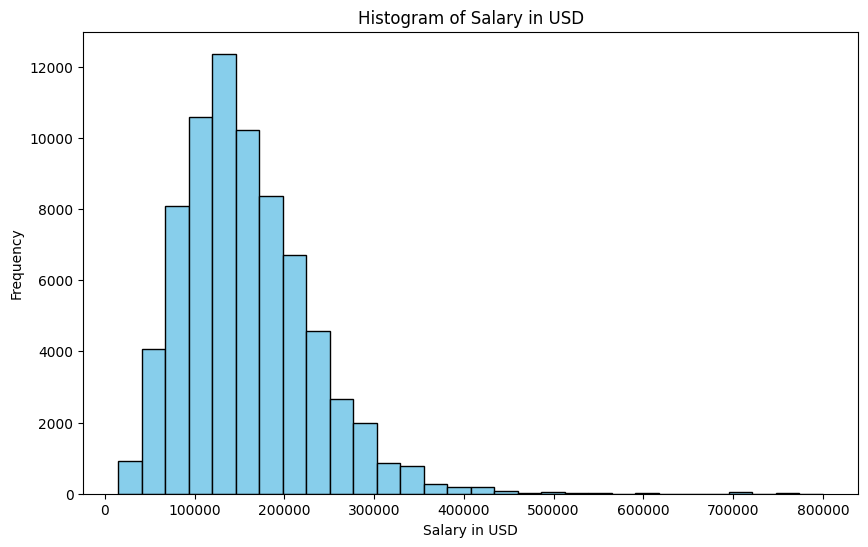

In [49]:
plt.figure(figsize=(10, 6))
#sns.hist(df['salary_in_usd'], kde=True, bins=10, color='blue')
plt.hist(df['salary_in_usd'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')

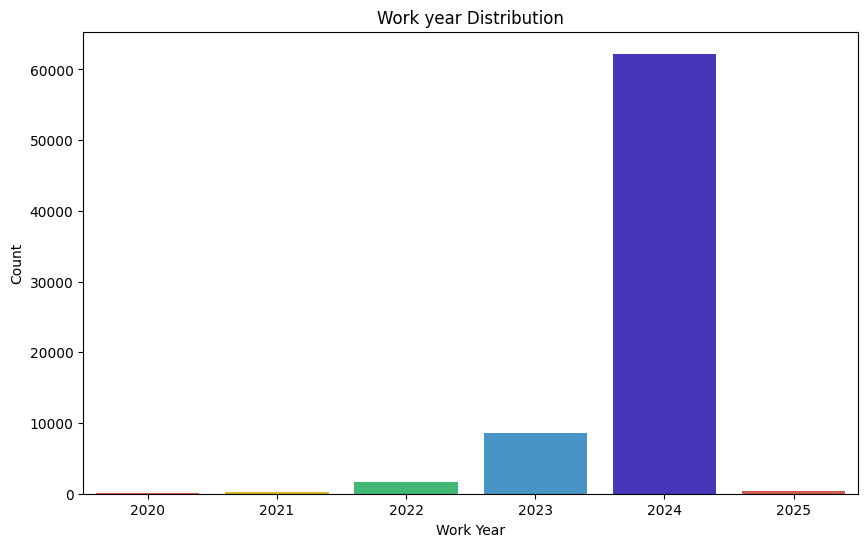

In [50]:
custom_palette = ['#e74c3c','#f1c40f', '#2ecc71', '#3498db', '#3521cd']

plt.figure(figsize=(10,6))
sns.countplot(x='work_year', data = df, palette=custom_palette)
plt.title('Work year Distribution')
plt.xlabel('Work Year')
plt.ylabel('Count')
plt.show()

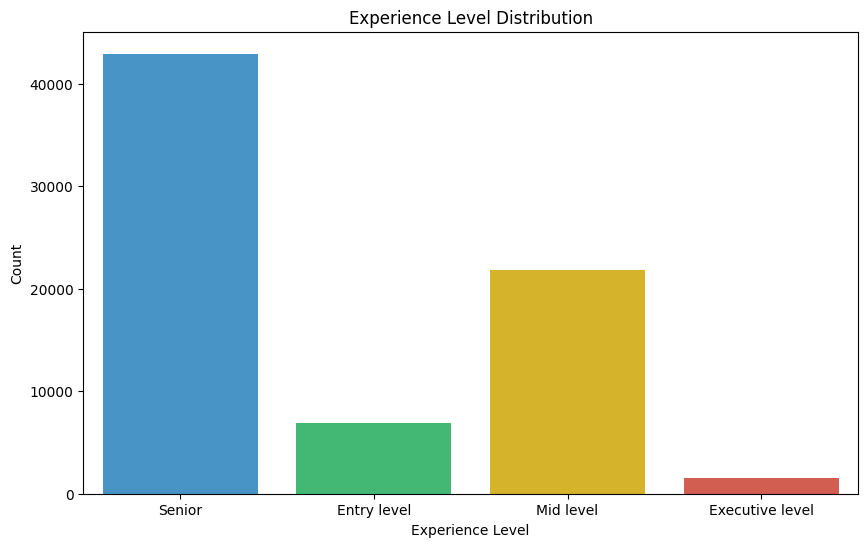

In [51]:
custom_palette = ['#3498db', '#2ecc71', '#f1c40f','#e74c3c']

plt.figure(figsize=(10,6))
sns.countplot(x='experience_level', data = df, palette=custom_palette)
plt.title("Experience Level Distribution")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.show()

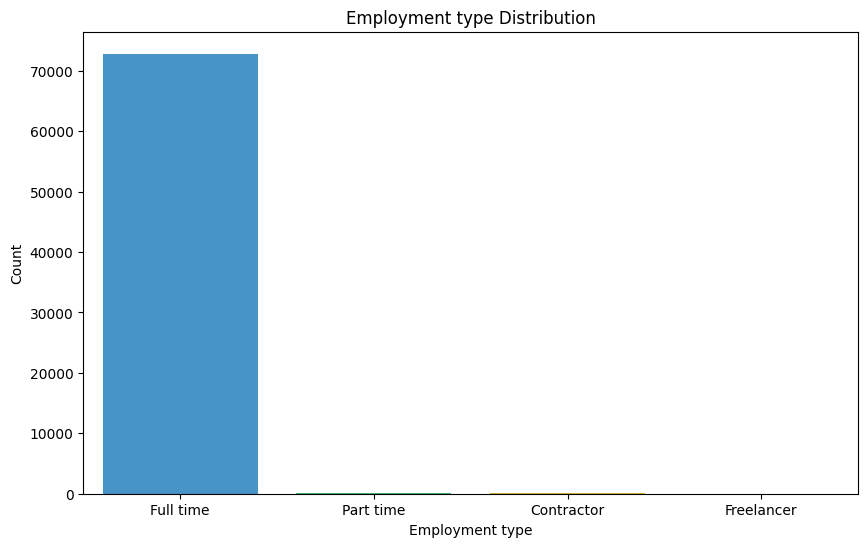

In [52]:
custom_palette = ['#3498db', '#2ecc71', '#f1c40f','#e74c3c']

plt.figure(figsize=(10,6))
sns.countplot(x='employment_type', data = df, palette=custom_palette)
plt.title("Employment type Distribution")
plt.xlabel("Employment type")
plt.ylabel("Count")
plt.show()

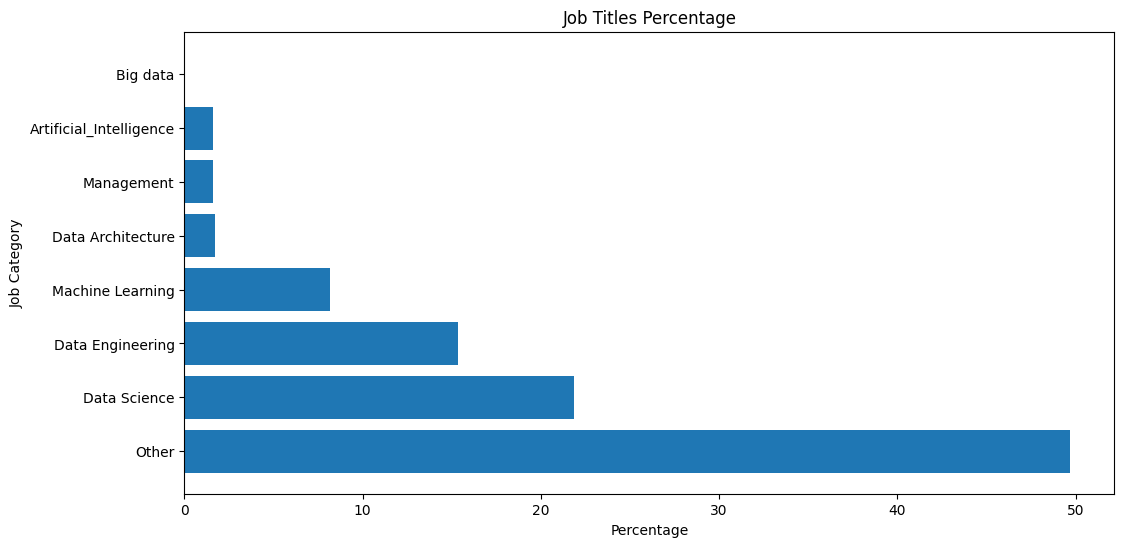

In [53]:
value_counts = df['job_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')
ax.set_title('Job Titles Percentage')
plt.show()

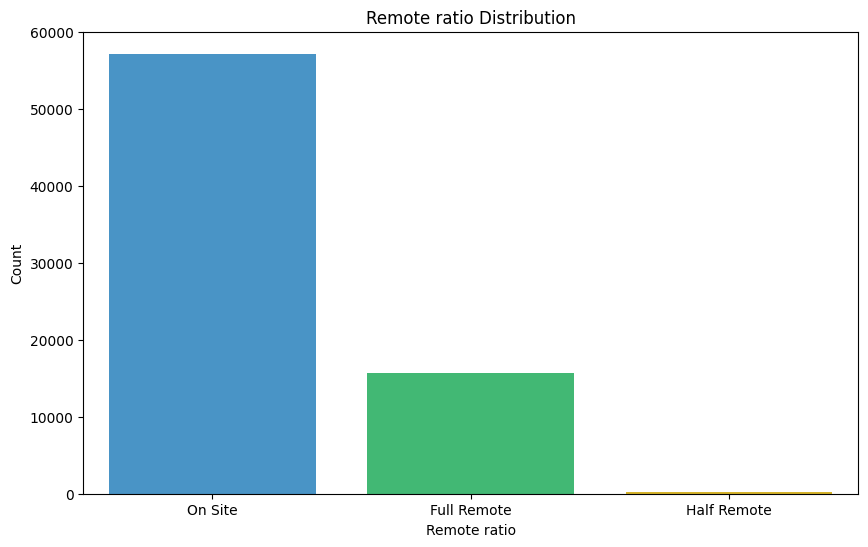

In [54]:
custom_palette = ['#3498db', '#2ecc71', '#f1c40f']

plt.figure(figsize=(10,6))
sns.countplot(x='remote_ratio', data = df, palette=custom_palette)
plt.title("Remote ratio Distribution")
plt.xlabel("Remote ratio")
plt.ylabel("Count")
plt.show()

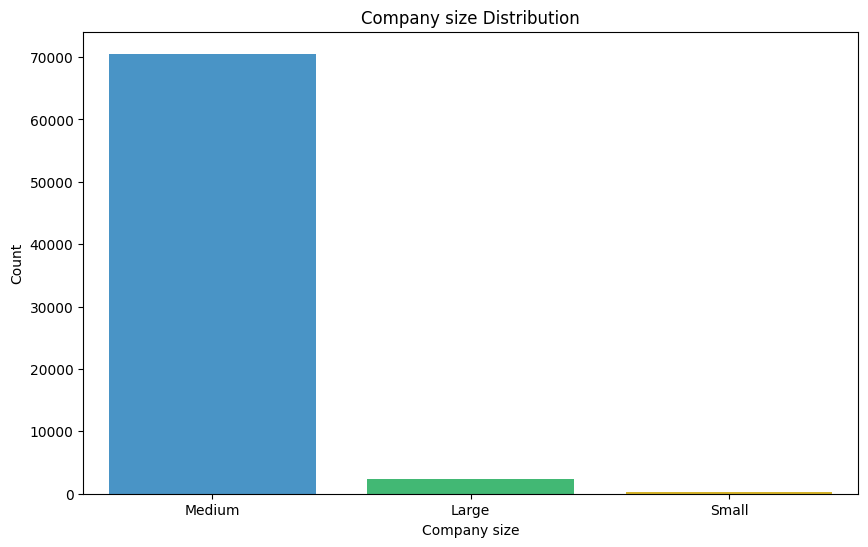

In [55]:
custom_palette = ['#3498db', '#2ecc71', '#f1c40f']

plt.figure(figsize=(10,6))
sns.countplot(x='company_size', data = df, palette=custom_palette)
plt.title("Company size Distribution")
plt.xlabel("Company size")
plt.ylabel("Count")
plt.show()

### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Phân tích hai biến</p>


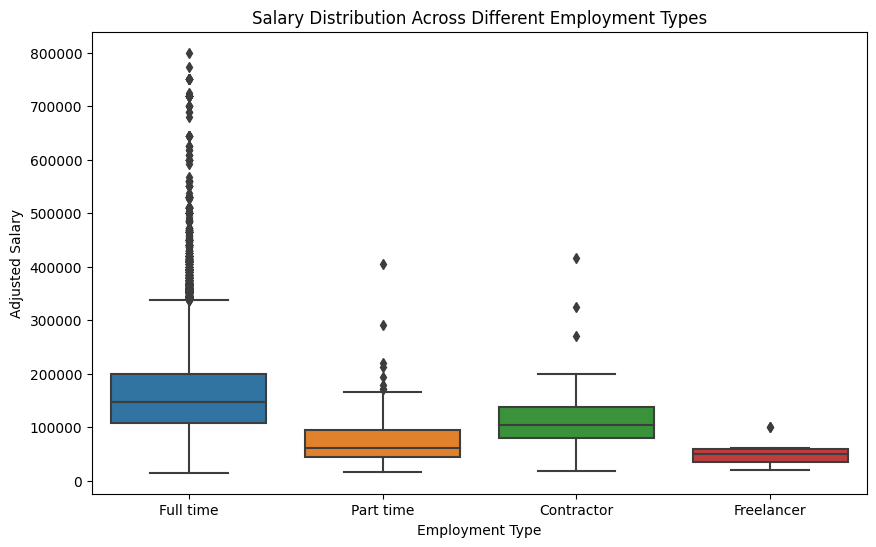

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Adjusted Salary')
plt.show()

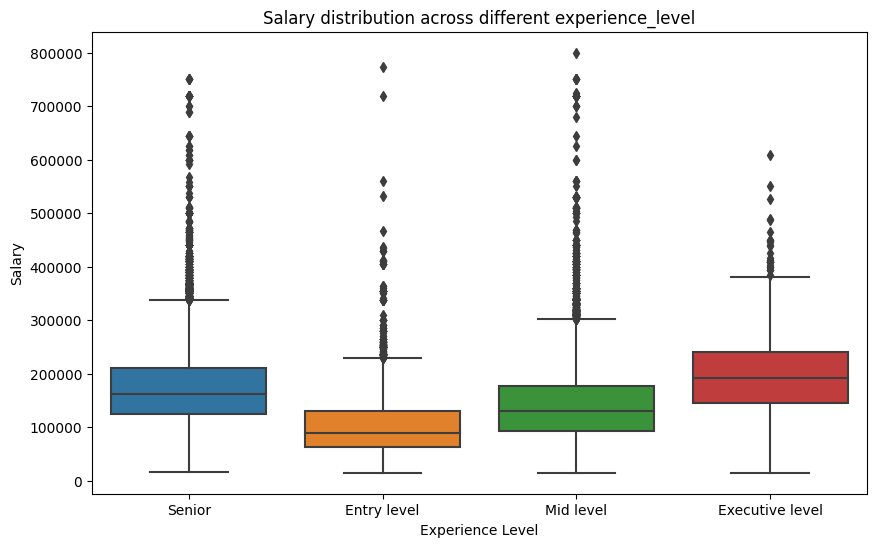

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x='experience_level', y='salary_in_usd')
plt.title('Salary distribution across different experience_level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

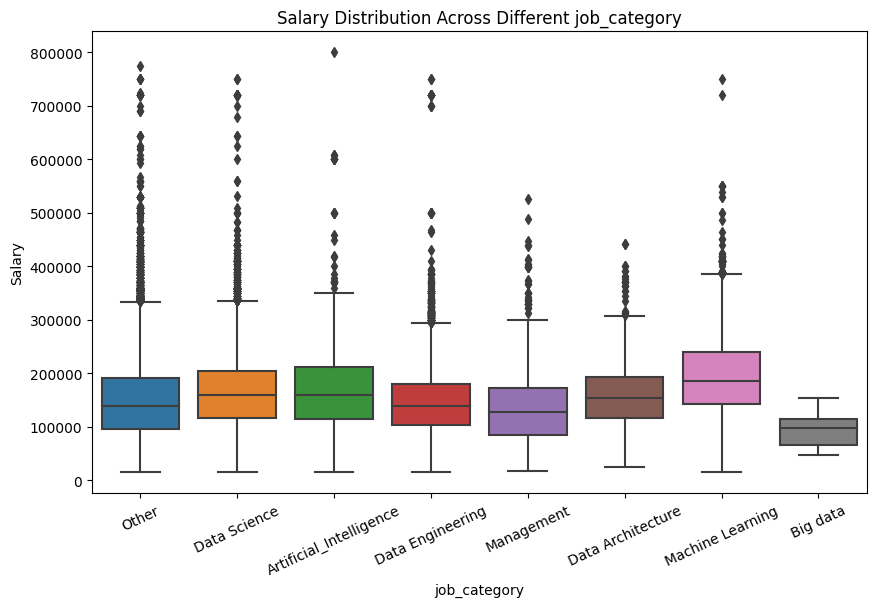

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='job_category', y='salary_in_usd')
plt.title('Salary Distribution Across Different job_category')
plt.xlabel('job_category')
plt.ylabel('Salary')
plt.xticks(rotation=25)
plt.show()

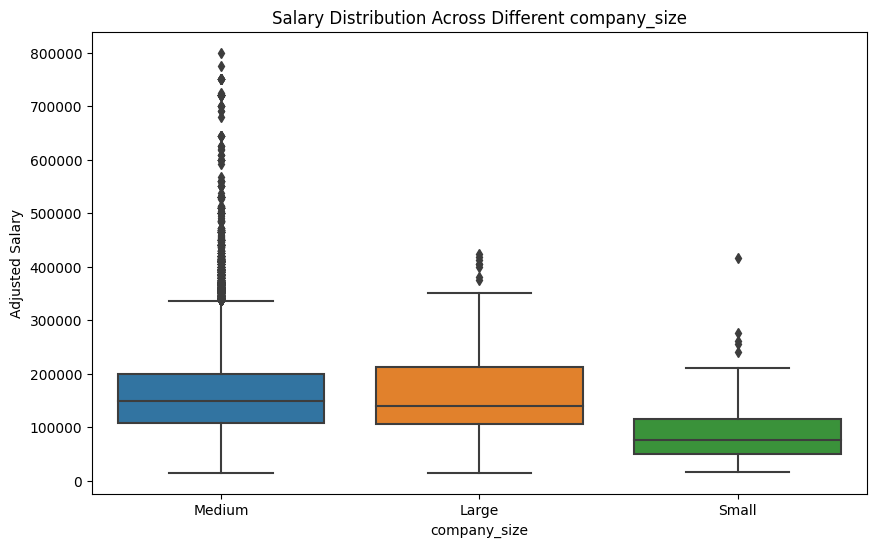

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd')
plt.title('Salary Distribution Across Different company_size')
plt.xlabel('company_size')
plt.ylabel('Adjusted Salary')
plt.show()

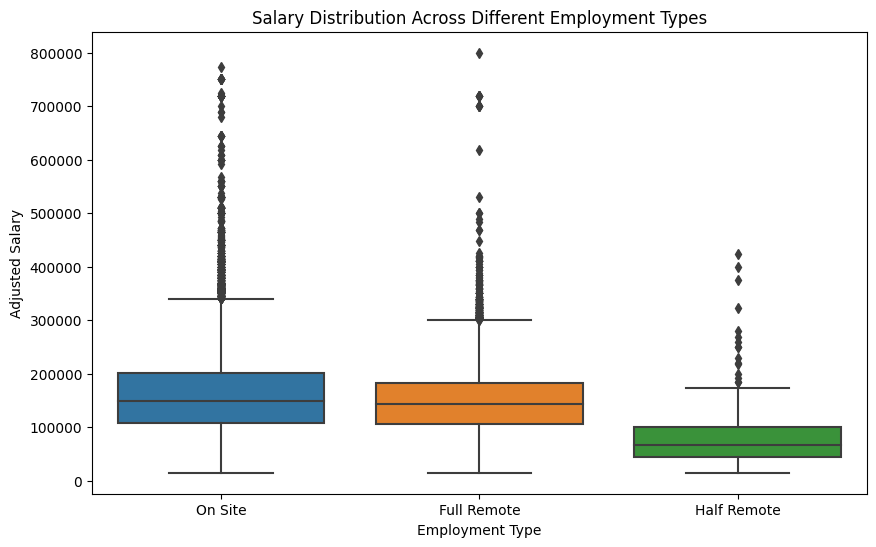

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Adjusted Salary')
plt.show()

## <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Build Model</p>

#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">ANOVA</p>

Ở phần kiểm định phương sai ANOVA này ta bắt đầu thực hiện với 2 biến đó là: 
* Biến giải thích ở đây là emnployment_Type.
* Biến phản hồi là salary_in_usd.
 - Employment_type : là loại hình thức làm việc với tổng có 4 hình thức làm việc đó là
    > Freelance: Hình thức làm việc tự do không gò bó thời gian làm việc
    > Full time: Thường làm việc theo khung giờ được đặt ra ví dụ như thời gian làm việc bắt đầu từ 8:00 sáng và kết thúc và 17:00 chiều
    > Part time: Khung giờ làm việc thường được xếp theo khung nửa ngày ví dụ như thời gian làm việc bắt đầu từ 8:00 sáng và kết thúc và 12:00 trưa
    > Contractor: Như được thuê để làm việc trong 1 dự án và trong khung làm việc nhất định theo trong hợp đồng ví dụ như Programmer được thuê theo hợp đồng 6 tháng để phát triển một phần mềm
 - Salary_in_usd : là loại tiền lương được trả theo năm tính theo đơn vị tiền tệ là USD

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     109.1
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           1.76e-70
Time:                        01:55:07   Log-Likelihood:            -9.2225e+05
No. Observations:               73148   AIC:                         1.845e+06
Df Residuals:                   73144   BIC:                         1.845e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

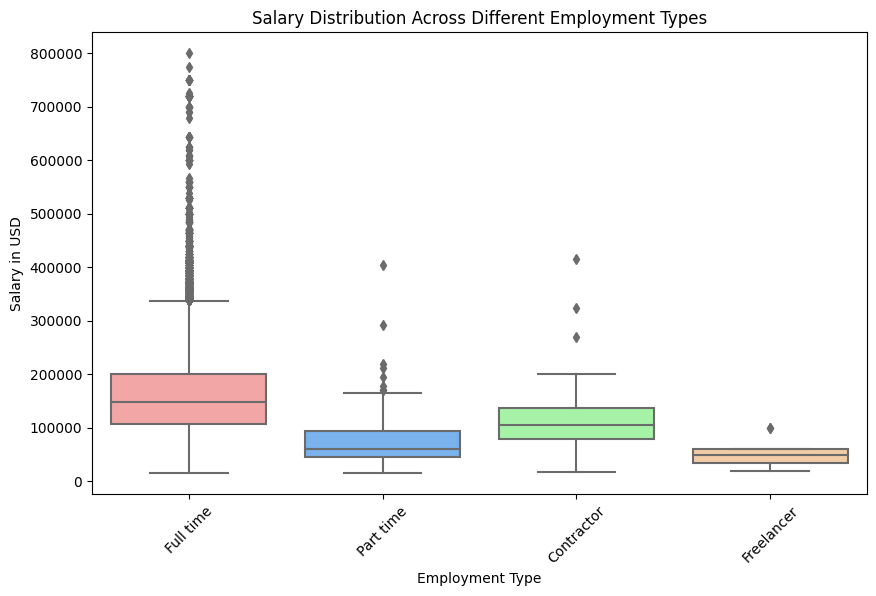

In [61]:
model2 = smf.ols(formula='salary_in_usd ~ C(employment_type)', data=df)
results2 = model2.fit()
print(results2.summary())

custom_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd', palette=custom_palette)
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()

Biến giải thích: Comnpany_size là biến nói về quy mô công ty bao gồm có 3 quy mô chính:
* Large(L): Quy mô công ty lớn.
* Medium(M): Quy mô công ty ở tầm trung bình khá.
* Small(S): Quy mô công ty nhỏ.

Biến phản hồi: Salary_in_usd là tiền lương được trả theo năm tính theo đơn vị USD.

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           2.27e-44
Time:                        01:55:08   Log-Likelihood:            -9.2232e+05
No. Observations:               73148   AIC:                         1.845e+06
Df Residuals:                   73145   BIC:                         1.845e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

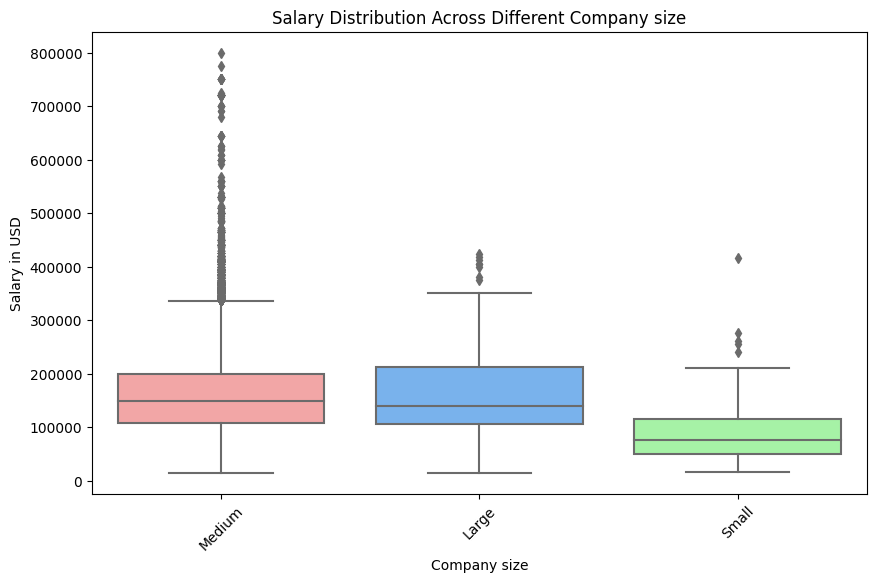

In [62]:
model1 = smf.ols(formula='salary_in_usd ~ C(company_size)', data=df)
results1 = model1.fit()
print(results1.summary())

custom_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd', palette=custom_palette)
plt.title('Salary Distribution Across Different Company size')
plt.xlabel('Company size')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()


work year(phân loại) và salary in usd (phản hồi)

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     88.63
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           2.86e-93
Time:                        01:55:08   Log-Likelihood:            -9.2220e+05
No. Observations:               73148   AIC:                         1.844e+06
Df Residuals:                   73142   BIC:                         1.844e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.023e+05 

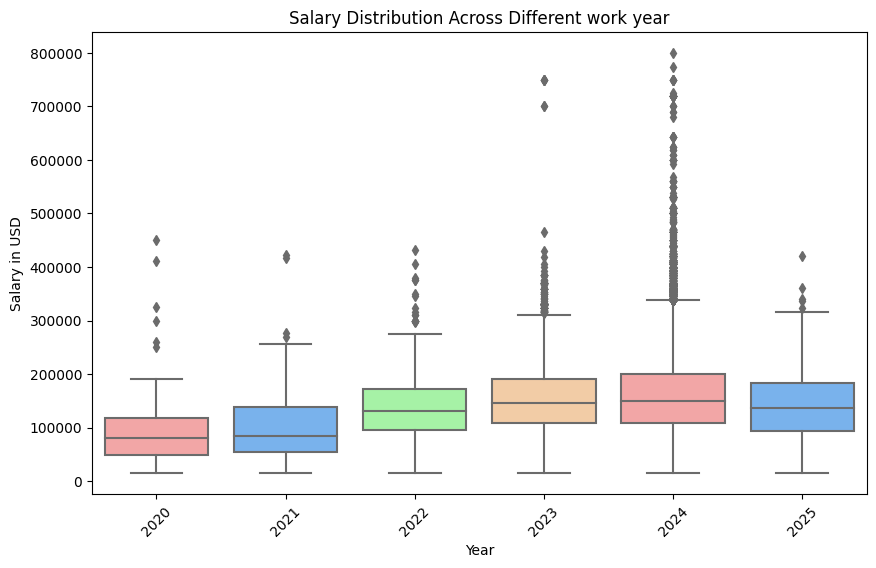

In [63]:
model3 = smf.ols(formula='salary_in_usd ~ C(work_year)', data=df)
results3 = model3.fit()
print(results3.summary())

custom_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_year', y='salary_in_usd', palette=custom_palette)
plt.title('Salary Distribution Across Different work year')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()

experience_level(giải thích) và salary in usd(phản hồi)

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     2781.
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:55:09   Log-Likelihood:            -9.1847e+05
No. Observations:               73148   AIC:                         1.837e+06
Df Residuals:                   73144   BIC:                         1.837e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

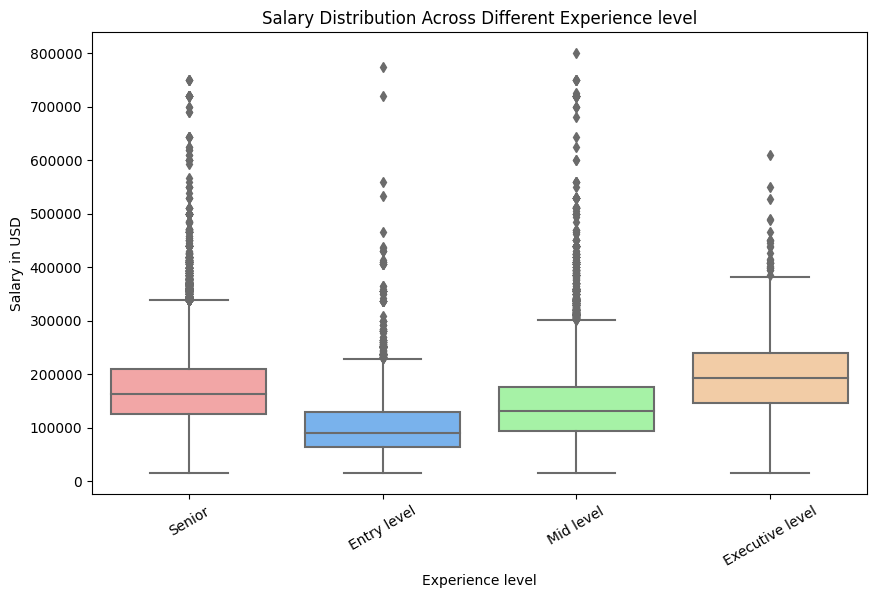

In [64]:
model4 = smf.ols(formula='salary_in_usd ~ C(experience_level)', data=df)
results4 = model4.fit()
print(results4.summary())

custom_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette=custom_palette)
plt.title('Salary Distribution Across Different Experience level')
plt.xlabel('Experience level')
plt.ylabel('Salary in USD')
plt.xticks(rotation=30)
plt.show()

job_category(giải thích) và salary in usd(phản hồi)

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     356.6
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:55:09   Log-Likelihood:            -9.2119e+05
No. Observations:               73148   AIC:                         1.842e+06
Df Residuals:                   73140   BIC:                         1.842e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


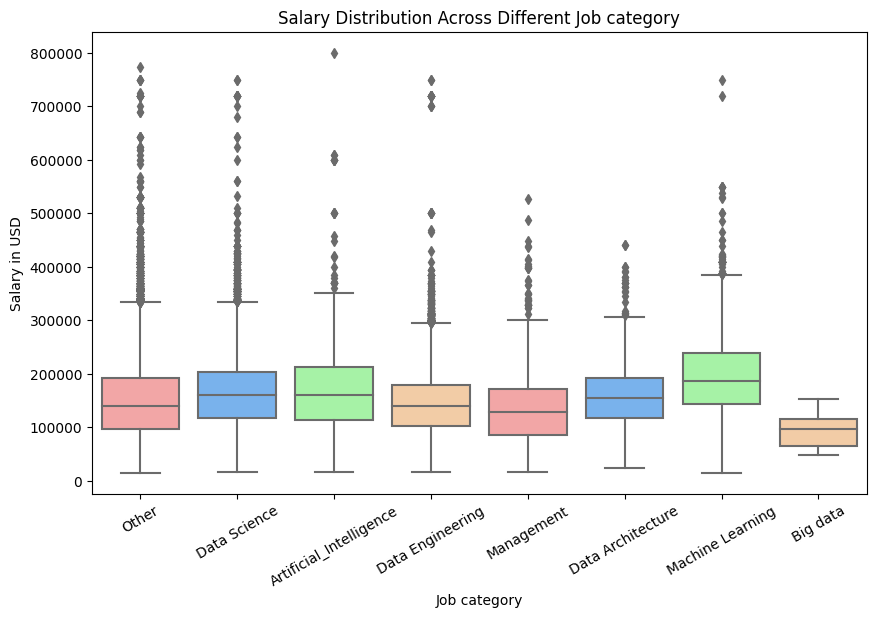

In [65]:
model5 = smf.ols(formula='salary_in_usd ~ C(job_category)', data=df)
results5 = model5.fit()
print(results5.summary())

custom_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='job_category', y='salary_in_usd', palette=custom_palette)
plt.title('Salary Distribution Across Different Job category')
plt.xlabel('Job category')
plt.ylabel('Salary in USD')
plt.xticks(rotation=30)
plt.show()

#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Kiểm định giả thuyết bằng Chi-square</p>

##### Company size và Experience level:
* Biến giải thích là Company size
* Biến phản hồi là Experience level

Kiểm định giả thuyết
* Giả thuyết null (H0): Quy mô công ty không ảnh hưởng đến cấp bậc kinh nghiệm. Nói cách khác, cấp bậc kinh nghiệm của nhân viên không phụ thuộc vào quy mô công ty.Dễ hiểu hơn là 2 biến hoạt động 1 cách độc lập
* Giả thuyết thay thế (Ha): Quy mô công ty có ảnh hưởng đến cấp bậc kinh nghiệm. Để mà dễ hiểu hơn là có mối liên hệ giữa cấp bậc kinh nghiệm của nhân viên và quy mô công ty.

In [66]:
df_new_table = df[df['company_size'].isin(['Medium', 'Large', 'Small'])][['company_size', 'experience_level']]

In [67]:
df_table1= pd.crosstab(df_new_table['company_size'], df_new_table['experience_level'], margins=True)
chi2, p, dof, expected = chi2_contingency(df_table1)
expected_df = pd.DataFrame(expected, index=df_table1.index, columns=df_table1.columns)
print("Bảng tần số chéo: ", df_table1)
print("Chi square value : ", chi2)
print("p-value", p)
print("Degress of freedom ", dof)
print("Expected frequencies: \n", expected)
print("Giá trị kỳ vọng:")
print(expected_df)

Bảng tần số chéo:  experience_level  Entry level  Executive level  Mid level  Senior    All
company_size                                                            
Large                     275               25        987    1120   2407
Medium                   6546             1461      20791   41738  70536
Small                      56                8         73      68    205
All                      6877             1494      21851   42926  73148
Chi square value :  289.23768178373393
p-value 8.51039348472369e-55
Degress of freedom  12
Expected frequencies: 
 [[2.26293802e+02 4.91613988e+01 7.19026590e+02 1.41251821e+03
  2.40700000e+03]
 [6.63143315e+03 1.44065161e+03 2.10707352e+04 4.13931801e+04
  7.05360000e+04]
 [1.92730492e+01 4.18699076e+00 6.12382430e+01 1.20301717e+02
  2.05000000e+02]
 [6.87700000e+03 1.49400000e+03 2.18510000e+04 4.29260000e+04
  7.31480000e+04]]
Giá trị kỳ vọng:
experience_level  Entry level  Executive level     Mid level        Senior  \
company_size

##### Experience level và job_Category:
* Biến giải thích là Experience level
* Biến phản hồi là job_Category

Kiểm định giả thuyết
* Giả thuyết null (H0): Cấp bậc kinh nghiệm không có ảnh hưởng đến loại công việc. Dễ hiểu hơn thì 2 biến này hoạt động độc lập với nhau.
* Giả thuyết thay thế (Ha): Cấp bậc kinh nghiệm có ảnh hưởng đến loại công việc mà họ chọn. Để mà dễ hiểu hơn là có mối liên hệ giữa cấp bậc kinh nghiệm của nhân viên và loại công việc.

In [68]:
df_new_table1 = df[df['experience_level'].isin(['Senior', 'Mid level', 'Entry level','Executive level'])][['job_category', 'experience_level']]

In [69]:
df_table2= pd.crosstab(df_new_table1['experience_level'], df_new_table1['job_category'], margins=True)
chi2, p, dof, expected = chi2_contingency(df_table2)
print("Bảng tần số chéo: ", df_table2)
print("Chi square value : ", chi2)
print("p-value", p)
print("Degress of freedom ", dof)
print("Expected frequencies: \n", expected)

Bảng tần số chéo:  job_category      Artificial_Intelligence  Big data  Data Architecture  \
experience_level                                                         
Entry level                            70         1                  4   
Executive level                        30         0                 10   
Mid level                             335         4                 30   
Senior                                723         3               1228   
All                                  1158         8               1272   

job_category      Data Engineering  Data Science  Machine Learning  \
experience_level                                                     
Entry level                    482           875               349   
Executive level                403           211                49   
Mid level                     3651          4965              1285   
Senior                        6686          9936              4287   
All                          11222        

In [70]:
expected_df2 = pd.DataFrame(expected, index=df_table2.index, columns=df_table2.columns)
print("Giá trị kỳ vọng:")
print(expected_df2)

Giá trị kỳ vọng:
job_category      Artificial_Intelligence  Big data  Data Architecture  \
experience_level                                                         
Entry level                    108.869224  0.752119         119.586920   
Executive level                 23.651392  0.163395          25.979767   
Mid level                      345.921392  2.389785         379.975830   
Senior                         679.557992  4.694701         746.457483   
All                           1158.000000  8.000000        1272.000000   

job_category      Data Engineering  Data Science  Machine Learning  \
experience_level                                                     
Entry level            1055.034916   1503.015790        561.268798   
Executive level         229.202001    326.524006        121.933341   
Mid level              3352.271040   4775.686786       1783.377126   
Senior                 6585.492044   9381.773418       3503.420736   
All                   11222.000000  15987.00

##### Experience level và employment_type:
* Biến giải thích là experience_level
* Biến phản hồi là employment_type

Kiểm định giả thuyết
* Giả thuyết null (H0): Cấp bậc kinh nghiệm của nhân viên không ảnh hưởng đến loại hình làm việc mà họ đã chọn. Dễ hiểu hơn là 2 biến này hoạt động độc lập nhau.
* Giả thuyết thay thế (Ha): Cấp bậc kinh nghiệm của nhân viên ảnh hưởng sâu sắc đến loại hình làm việc mà họ đã chọn. Dễ hiểu hơn là 2 biến này hoạt động có qua có lại với nhau.

In [71]:
df_new_table2 = df[df['experience_level'].isin(['Senior', 'Mid level', 'Entry level','Executive level'])][['employment_type', 'experience_level']]

In [72]:
df_table3= pd.crosstab(df_new_table2['experience_level'], df_new_table2['employment_type'], margins=True)
chi2, p, dof, expected = chi2_contingency(df_table3)
print("Bảng tần số chéo: ", df_table3)
print("Chi square value : ", chi2)
print("p-value", p)
print("Degress of freedom ", dof)
print("Expected frequencies: \n", expected)

Bảng tần số chéo:  employment_type   Contractor  Freelancer  Full time  Part time    All
experience_level                                                     
Entry level               34           4       6735        104   6877
Executive level            3           0       1491          0   1494
Mid level                 63           6      21734         48  21851
Senior                    49           6      42848         23  42926
All                      149          16      72808        175  73148
Chi square value :  592.8777097108812
p-value 7.407961716474738e-116
Degress of freedom  16
Expected frequencies: 
 [[1.40082162e+01 1.50423798e+00 6.84503494e+03 1.64526029e+01
  6.87700000e+03]
 [3.04322743e+00 3.26789523e-01 1.48705572e+03 3.57426040e+00
  1.49400000e+03]
 [4.45097474e+01 4.77957019e+00 2.17494341e+04 5.22765489e+01
  2.18510000e+04]
 [8.74388090e+01 9.38940231e+00 4.27264752e+04 1.02696588e+02
  4.29260000e+04]
 [1.49000000e+02 1.60000000e+01 7.28080000e+04 1.750000

In [73]:
expected_df3 = pd.DataFrame(expected, index=df_table3.index, columns=df_table3.columns)
print("Giá trị kỳ vọng:")
print(expected_df3)

Giá trị kỳ vọng:
employment_type   Contractor  Freelancer     Full time   Part time      All
experience_level                                                           
Entry level        14.008216    1.504238   6845.034943   16.452603   6877.0
Executive level     3.043227    0.326790   1487.055723    3.574260   1494.0
Mid level          44.509747    4.779570  21749.434134   52.276549  21851.0
Senior             87.438809    9.389402  42726.475201  102.696588  42926.0
All               149.000000   16.000000  72808.000000  175.000000  73148.0


##### Experience level và remote ratio:
* Biến giải thích là experience_level
* Biến phản hồi là remote ratio

Kiểm định giả thuyết
* Giả thuyết null (H0): Cấp bậc kinh nghiệm của nhân viên không ảnh hưởng đến việc làm từ xa mà họ đã chọn. Dễ hiểu hơn là 2 biến này hoạt động độc lập nhau.
* Giả thuyết thay thế (Ha): Cấp bậc kinh nghiệm của nhân viên ảnh hưởng sâu sắc đến việc làm từ xa mà họ đã chọn. Dễ hiểu hơn là 2 biến này hoạt động có qua có lại với nhau.

In [74]:
df_new_table3 = df[df['experience_level'].isin(['Senior', 'Mid level', 'Entry level','Executive level'])][['remote_ratio', 'experience_level']]

In [75]:
df_table4= pd.crosstab(df_new_table3['experience_level'], df_new_table3['remote_ratio'], margins=True)
chi2, p, dof, expected = chi2_contingency(df_table4)
print("Bảng tần số chéo: ", df_table4)
print("Chi square value : ", chi2)
print("p-value", p)
print("Degress of freedom ", dof)
print("Expected frequencies: \n", expected)

Bảng tần số chéo:  remote_ratio      Full Remote  Half Remote  On Site    All
experience_level                                          
Entry level              1062           90     5725   6877
Executive level           339            9     1146   1494
Mid level                3776          106    17969  21851
Senior                  10470           76    32380  42926
All                     15647          281    57220  73148
Chi square value :  787.0258501311826
p-value 1.0015233204316181e-160
Degress of freedom  12
Expected frequencies: 
 [[1.47105073e+03 2.64181796e+01 5.37953109e+03 6.87700000e+03]
 [3.19579729e+02 5.73924099e+00 1.16868103e+03 1.49400000e+03]
 [4.67412092e+03 8.39412014e+01 1.70929379e+04 2.18510000e+04]
 [9.18224862e+03 1.64901378e+02 3.35788500e+04 4.29260000e+04]
 [1.56470000e+04 2.81000000e+02 5.72200000e+04 7.31480000e+04]]


In [76]:
expected_df4 = pd.DataFrame(expected, index=df_table4.index, columns=df_table4.columns)
print("Giá trị kỳ vọng:")
print(expected_df4)

Giá trị kỳ vọng:
remote_ratio       Full Remote  Half Remote       On Site      All
experience_level                                                  
Entry level        1471.050733    26.418180   5379.531088   6877.0
Executive level     319.579729     5.739241   1168.681030   1494.0
Mid level          4674.120919    83.941201  17092.937879  21851.0
Senior             9182.248619   164.901378  33578.850003  42926.0
All               15647.000000   281.000000  57220.000000  73148.0


#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Logistic Regression</p>

#### remote_ratio và employment_type
* Biến giải thích nhị phân: employment_full_time (ở biến này mình sẽ tinh chỉnh dữ liệu chỉ còn full-time = 1 là nhân viên làm toàn thời gian và không full-time =0 là nhân viên không làm toàn thời gian
* Biến phản hồi nhị phân: remote_binary (ở biến này ở biến này mình sẽ tinh chỉnh dữ liệu chỉ còn remote_binary = 1 là nhân viên làm việc từ xa và không remote_binary =0 là nhân viên không làm việc từ xa.

In [77]:
df['remote_binary'] = df['remote_ratio'].apply(lambda x: 1 if x == 'Full Remote' else 0)

In [78]:
df['employment_full_time'] = df['employment_type'].apply(lambda x: 1 if x == 'Full time' else 0)

In [79]:
df2 = df[['remote_binary', 'employment_full_time']]
df2

,remote_binary,employment_full_time
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
73143,1,1
73144,1,1
73145,1,1
73146,1,0


Như ta thấy được Intercept (giao điểm) có nghĩa là -0.2451 điều này có nghĩa là cho biết rằng khi tất cả các yếu tố khác bằng 0 thì xác suất mà một nhân viên làm việc từ xa là khoảng 43.8%.

ODD = 0.4313 khi employment_full_time = 1 có nghĩa khi nhân viên làm full-time thì ODD của nhân viên làm việc từ xa là 0.4313. Điều này có nghĩa là khả năng làm việc từ xa của nhân viên toàn thời gian thấp hơn so với nhân viên không làm việc từ xa.

ODD = 0.7826 khi employment_full_time = 0 có nghĩa khi nhân viên không làm full-time thì ODD của nhân viên làm việc từ xa là 07826. Điều này có nghĩa là khả năng làm việc từ xa của nhân viên không làm việc toàn thời gian thấp hơn so với khả năng nhân viên không làm việc từ xa.

ODD (Tỷ lệ chênh) giữa nhóm employment_full_time = 0 và employment_full_time = 1 là 0.5511. Dễ hiểu hơn là người làm việc toàn thời gian có khả năng làm việc từ xa thấp hơn khoảng 0.5511 lần so với người không làm việc toàn thời gian.

Độ chính xác của model thứ nhất dưới hình theo chúng ta chiêm ngưỡng được là 69.81% là mô hình cho thấy được khả năng dự đoán khá là hợp lý trong hoàn cảnh nhưng chưa hoàn hảo lắm. Có thể xác định được rằng nhân viên có làm việc từ xa hay không thì dựa trên biến employment_full_time.

Tóm tắt lại cho dễ hiểu model thứ nhất là cho ta thấy được độ chính xác đạt 69.81% cho thấy được khả năng dự đoán khá tốt.Kết quả của odds cho ta thấy được làm việc từ xa thấp hơn đáng kể đối với nhân viên toàn thời gian so với nhân viên không làm toàn thời gian. Tuy nhiên, vẫn còn khoảng 30.19% dự đoán không chính xác, cần thêm một vài biến giải thích để cải thiện độ chính xác hơn.

In [80]:
model = smf.logit('remote_binary ~ employment_full_time', data=df2).fit()
print(model.summary())

coef_employment_full_time = model.params['employment_full_time']
intercept = model.params['Intercept']

odds_employment_full_time_1 = np.exp(intercept + coef_employment_full_time * 1)
odds_employment_full_time_0 = np.exp(intercept + coef_employment_full_time * 0)

print(f"ODD khi employment_full_time = 1: {odds_employment_full_time_1:.4f}")
print(f"ODD khi employment_full_time = 0: {odds_employment_full_time_0:.4f}")

odds_ratio = odds_employment_full_time_1 / odds_employment_full_time_0
print(f"Tỉ lệ ODD giữa employment_full_time = 1 và employment_full_time = 0: {odds_ratio:.4f}")

predictions = model.predict(df)

prediction_binary = [1 if x > 0.5 else 0 for x in predictions]

accuracy = accuracy_score(df['remote_binary'], prediction_binary)
print(f'Độ chính xác của mô hình: {accuracy:.4f}')

Optimization terminated successfully.
         Current function value: 0.518852
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          remote_binary   No. Observations:                73148
Model:                          Logit   Df Residuals:                    73146
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Mar 2025   Pseudo R-squ.:               0.0004572
Time:                        01:55:10   Log-Likelihood:                -37953.
converged:                       True   LL-Null:                       -37970.
Covariance Type:            nonrobust   LLR p-value:                 3.800e-09
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6061      0.113     -5.341      0.000      -0.829      -0.384

#### Experince_level, salary_in_usd và company_size.
* Biến giải thích (có cả định lượng và phân loại):Experince_level, salary_in_usd và company_size.
* Biến phản hồi nhị phân: remote_binary (ở biến này ở biến này mình sẽ tinh chỉnh dữ liệu chỉ còn remote_binary = 1 là nhân viên làm việc từ xa và không remote_binary =0 là nhân viên không làm việc từ xa.

* Intercept = -0.8712 có nghĩa là ngay cả khi không có yếu tố nào khác. Dễ hiểu hơn là có một xác suất cơ bản về khả năng làm việc từ xa mà không ảnh hưởng đến bất kỳ biến giải thích nào.

* Trường hợp 1: là dòng đầu tiên ta có thể thấy rằng Khi nhân viên có trình độ kinh nghiệm trung bình (MI), mức lương là 59,615 USD, và làm việc tại công ty nhỏ (S), odds của việc làm việc từ xa là 1.414072. Điều này có nghĩa là khả năng làm việc từ xa của nhân viên trong trường hợp này cao hơn so với khả năng không làm việc từ xa.

* Trường hợp 2: Khi nhân viên có trình độ kinh nghiệm cao (SE), mức lương là 252,000 USD, và làm việc tại công ty trung bình (M), odds của việc làm việc từ xa là 1.296487. Điều này có nghĩa là khả năng làm việc từ xa của nhân viên trong trường hợp này cao hơn so với khả năng không làm việc từ xa.

* Trường hợp 3: Khi nhân viên có trình độ kinh nghiệm cao (SE), mức lương là 168,000 USD, và làm việc tại công ty trung bình (M), odds của việc làm việc từ xa là 1.373962. Điều này có nghĩa là khả năng làm việc từ xa của nhân viên trong trường hợp này cao hơn so với khả năng không làm việc từ xa.

* Trường hợp 4: Khi nhân viên có trình độ kinh nghiệm trung bình (MI), mức lương là 199,500 USD, và làm việc tại công ty trung bình (M), odds của việc làm việc từ xa là 1.290371. Điều này có nghĩa là khả năng làm việc từ xa của nhân viên trong trường hợp này cao hơn so với khả năng không làm việc từ xa.

* Trường hợp 5 và cũng là trường hợp cuối cùng để kết thúc đánh giá ODD. Khi  mà nhân viên có trình độ kinh nghiệm trung bình (MI), mức lương là 86,700 USD, và làm việc tại công ty trung bình (M), odds của việc làm việc từ xa là 1.395981. Điều này có nghĩa là khả năng làm việc từ xa của nhân viên trong trường hợp này cao hơn so với khả năng không làm việc từ xa.
* Độ chính xác của mô hình là 0.6843, nghĩa là mô hình đúng khoảng 68.43% trường hợp trong tập dữ liệu. Mức độ chính xác này cho thấy mô hình có khả năng phân loại tốt hơn so với đoán ngẫu nhiên

* Kết luận rút ra rằng cho thấy trạng thái làm việc toàn thời gian và trình độ kinh nghiệm là những yếu tố quan trọng ảnh hưởng đến khả năng làm việc từ xa, với nhân viên toàn thời gian có ít khả năng làm việc từ xa hơn.


In [81]:
df['experience_level_encoded'] = df['experience_level'].map({'Entry level': 1, 'Mid level': 2, 'Senior': 3, 'Executive level': 4})
df['company_size_encoded'] = df['company_size'].map({'Small': 1, 'Medium': 2, 'Large': 3})

df['remote_binary'] = np.where(df['remote_ratio'].isin(['Full Remote', 'Half Remote']), 1, 0)


model = smf.logit('remote_binary ~ experience_level_encoded + salary_in_usd + company_size_encoded', data=df).fit()

print(model.summary())

odds = np.exp(model.predict(df[['experience_level_encoded', 'salary_in_usd', 'company_size_encoded']]))

df['odds'] = odds

predictions = model.predict(df)

prediction_binary = [1 if x > 0.5 else 0 for x in predictions]

accuracy = accuracy_score(df['remote_binary'], prediction_binary)
print(f'Độ chính xác của mô hình: {accuracy:.4f}')
print(df[['experience_level', 'salary_in_usd', 'company_size', 'remote_binary', 'odds']].head())

Optimization terminated successfully.
         Current function value: 0.515097
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          remote_binary   No. Observations:                73148
Model:                          Logit   Df Residuals:                    73144
Method:                           MLE   Df Model:                            3
Date:                Mon, 03 Mar 2025   Pseudo R-squ.:                 0.01708
Time:                        01:55:10   Log-Likelihood:                -37678.
converged:                       True   LL-Null:                       -38333.
Covariance Type:            nonrobust   LLR p-value:                1.534e-283
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.2335      0.112    -11.006      0.000      -1.453

In [82]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['work_year','experience_level', 'employment_type', 'company_size', 
              'remote_ratio', 'job_category']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [83]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'job_category',
       'years_of_experience', 'remote_binary', 'employment_full_time',
       'experience_level_encoded', 'company_size_encoded', 'odds'],
      dtype='object')

In [84]:
df = df.drop(['job_title','employee_residence', 'company_location','remote_binary','employment_full_time','experience_level_encoded','company_size_encoded','odds'], axis = 1)

In [85]:
X = df.drop(columns=['salary_in_usd'])
df['salary_category'] = df['salary_in_usd'].apply(lambda x: 1 if x > 50000 else 0)
y = df['salary_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

In [88]:
# Đánh giá hiệu suất mô hình
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9735
Precision: 0.9735
Recall: 0.9999
F1-Score: 0.9866
Confusion Matrix:
[[    4   387]
 [    1 14238]]


In [89]:
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy, precision, recall, f1]
})
results.to_csv('logistic_regression_performance.csv', index=False)

print("Kết quả đánh giá hiệu suất của mô hình Linear Regression đã được lưu vào file 'logistic_regression_performance.csv'")

Kết quả đánh giá hiệu suất của mô hình Linear Regression đã được lưu vào file 'logistic_regression_performance.csv'


In [90]:
os.listdir()

['logistic_regression_performance.csv', '.virtual_documents']

In [91]:
shutil.move('logistic_regression_performance.csv', '/kaggle/working/logistic_regression_performance.csv')

'/kaggle/working/logistic_regression_performance.csv'

#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Linear Regression</p>

In [92]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['work_year','experience_level', 'employment_type', 'company_size', 
              'remote_ratio', 'job_category']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [93]:
# Tính IQR cho cột 'salary_in_usd'
Q1 = df['salary_in_usd'].quantile(0.25)  # First quartile (Q1)
Q3 = df['salary_in_usd'].quantile(0.75)  # Third quartile (Q3)
IQR = Q3 - Q1  # Interquartile Range (IQR)

# Xác định giới hạn outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Kiểm tra các giá trị outliers
outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]

# Hiển thị các outliers
print("Số lượng outliers:", outliers.shape[0])
print(outliers)

# Nếu bạn muốn loại bỏ các outliers này
df_cleaned = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

# Hiển thị dữ liệu sau khi loại bỏ outliers
print("Dữ liệu sau khi loại bỏ outliers:")
print(df_cleaned.head())


Số lượng outliers: 1369
       work_year  experience_level  employment_type  salary_in_usd  \
6              5                 3                2         360200   
212            5                 2                2         419750   
404            4                 0                2         720000   
406            4                 2                2         720000   
408            4                 2                2         720000   
...          ...               ...              ...            ...   
72878          2                 3                2         380000   
72930          0                 2                2         450000   
73075          1                 1                0         416000   
73140          1                 2                2         423000   
73143          0                 3                2         412000   

       remote_ratio  company_size  job_category  years_of_experience  \
6                 2             1             7                

In [94]:
# Xác định giới hạn outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Text(0, 0.5, 'Frequency')

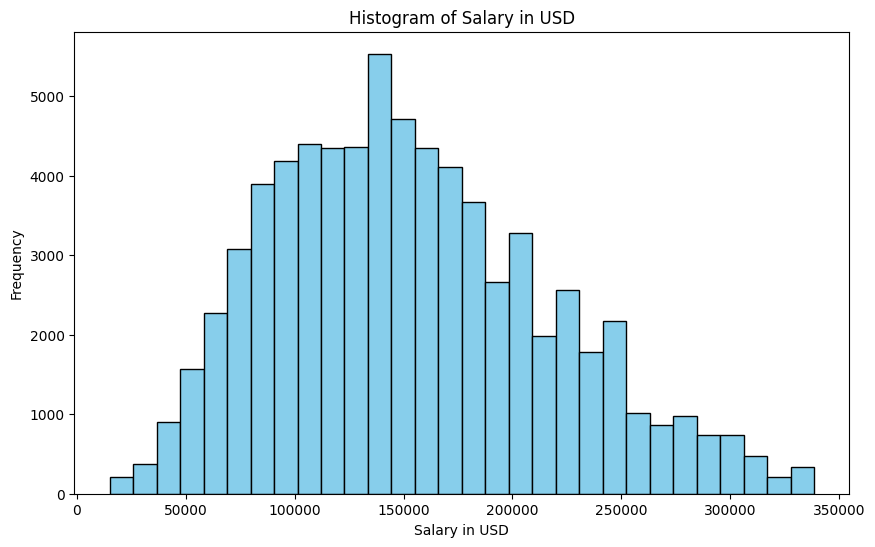

In [95]:
plt.figure(figsize=(10, 6))
#sns.hist(df['salary_in_usd'], kde=True, bins=10, color='blue')
plt.hist(df_cleaned['salary_in_usd'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')

In [96]:
df['log_salary_in_usd'] = np.log(df['salary_in_usd'])

In [97]:
X = df.drop(columns=['salary_in_usd', 'log_salary_in_usd'])
y = df['log_salary_in_usd']

In [98]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(X_test)

In [101]:
# Tính toán các chỉ số hiệu suất
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Tính Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

In [102]:
# Tính Adjusted R-squared (Điều chỉnh R²)
n = X_test.shape[0]  # Số lượng mẫu trong tập kiểm tra
p = X_test.shape[1]  # Số lượng đặc trưng (features)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# In kết quả đánh giá
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
print(f'Adjusted R-squared (Adjusted R2): {adjusted_r2}')

Mean Absolute Error (MAE): 0.3207568784346282
Mean Squared Error (MSE): 0.1610132652768823
Root Mean Squared Error (RMSE): 0.4012645826345534
R-squared (R2): 0.29366393238465416
Adjusted R-squared (Adjusted R2): 0.2932774548153413


In [103]:
results = {
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 
               'Root Mean Squared Error (RMSE)', 'R-squared (R2)', 'Adjusted R-squared'],
    'Value': [mae, mse, rmse, r2, adjusted_r2]
}
results_df = pd.DataFrame(results)

# Xuất ra file CSV
results_df.to_csv('linear_regression_performance.csv', index=False)

print("Kết quả đánh giá hiệu suất của mô hình Linear Regression đã được lưu vào file 'linear_regression_performance.csv'.")

Kết quả đánh giá hiệu suất của mô hình Linear Regression đã được lưu vào file 'linear_regression_performance.csv'.


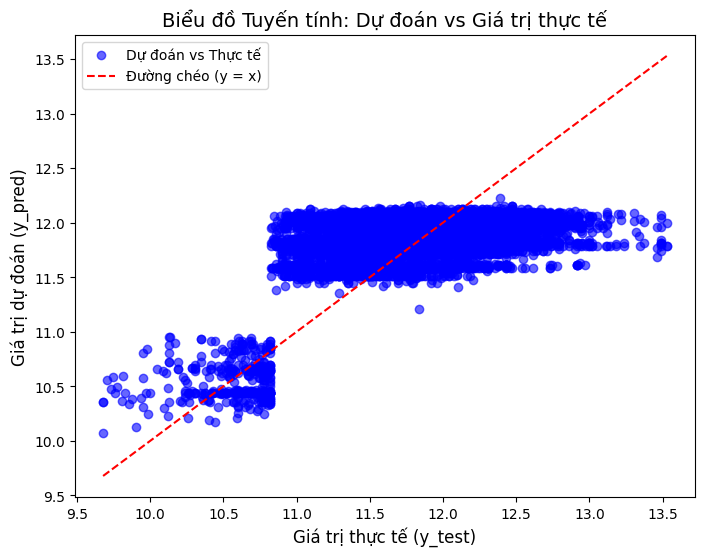

In [104]:
plt.figure(figsize=(8, 6))

# Dự đoán so với giá trị thực tế
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Dự đoán vs Thực tế')

# Vẽ đường chéo (y = x) để so sánh
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Đường chéo (y = x)')

# Thêm nhãn và tiêu đề
plt.xlabel('Giá trị thực tế (y_test)', fontsize=12)
plt.ylabel('Giá trị dự đoán (y_pred)', fontsize=12)
plt.title('Biểu đồ Tuyến tính: Dự đoán vs Giá trị thực tế', fontsize=14)
plt.legend()

# Hiển thị biểu đồ
plt.show()

#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Decision Tree</p>

In [105]:
X = df.drop(['experience_level'], axis=1)  # Các cột đặc trưng (features)
y = df['experience_level']  # Cột mục tiêu (target)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [108]:
y_pred = dt_model.predict(X_test)

In [109]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1430
           1       1.00      1.00      1.00       281
           2       1.00      1.00      1.00      4371
           3       1.00      1.00      1.00      8548

    accuracy                           1.00     14630
   macro avg       1.00      1.00      1.00     14630
weighted avg       1.00      1.00      1.00     14630

Confusion Matrix:
 [[1430    0    0    0]
 [   0  281    0    0]
 [   0    0 4371    0]
 [   0    0    0 8548]]


In [110]:
print(f'Max Depth of the Decision Tree: {dt_model.get_depth()}')
print(f'Number of leaves: {dt_model.get_n_leaves()}')

Max Depth of the Decision Tree: 2
Number of leaves: 4


In [111]:
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print(tree_rules)

|--- years_of_experience <= 4.00
|   |--- years_of_experience <= 1.50
|   |   |--- class: 0
|   |--- years_of_experience >  1.50
|   |   |--- class: 2
|--- years_of_experience >  4.00
|   |--- years_of_experience <= 9.50
|   |   |--- class: 3
|   |--- years_of_experience >  9.50
|   |   |--- class: 1



* Gốc của cây đầu tiên kiểm tra số năm kinh nghiệm nếu nhỏ hơn bằng 4 thì dữ liệu tiếp tục đưa vào nhánh con bên trái còn sai thì bên vào bên phải.
* Tiếp đến lá bên trái nếu số năm kinh nghiệm nhỏ hơn hoặc bằng 1.5 năm thì sẽ phân loại vào lớp 1 là Entry level
* Còn không thì sẽ phân loại vào lớp 3 là mid level
* Nhánh bên phải khi số năm kinh nghiệm nhỏ hơn 9.5 năm thì sẽ phân loại vào lớp Senior Còn không thì sẽ phân loại vào Executive level.

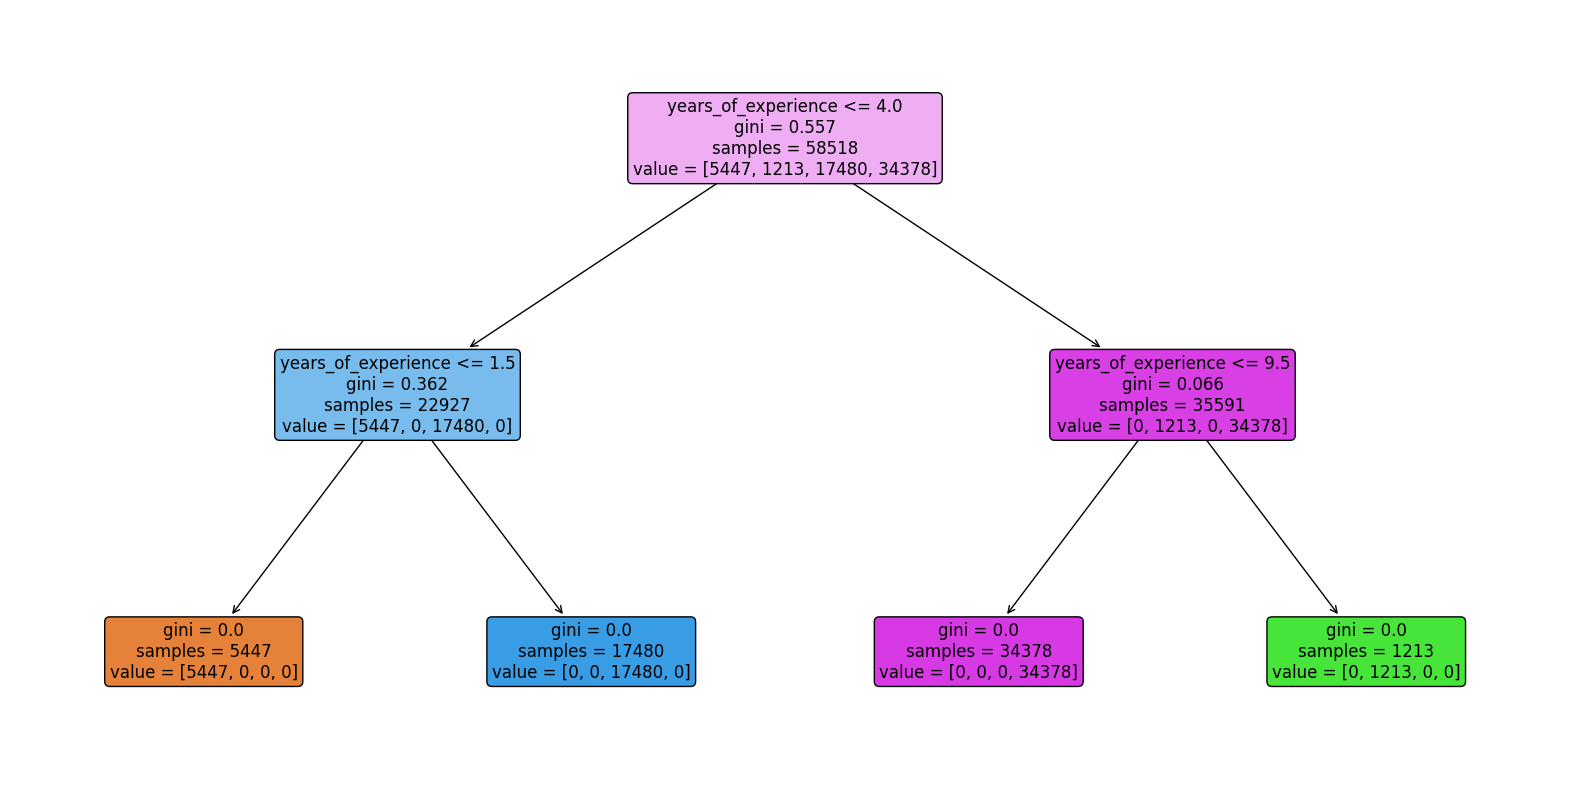

In [112]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, rounded=True, fontsize=12)
plt.show()
